In [1]:
import pandas as pd

df_train = pd.read_csv("train.csv")
# print(df_train.describe())
print(df_train.shape)
print(df_train.columns)
# print(df_train)
print(df_train.isnull().any())
print(df_train.isna().any())

(300000, 32)
Index(['id', 'cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
       'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15',
       'cat16', 'cat17', 'cat18', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4',
       'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'target'],
      dtype='object')
id        False
cat0      False
cat1      False
cat2      False
cat3      False
cat4      False
cat5      False
cat6      False
cat7      False
cat8      False
cat9      False
cat10     False
cat11     False
cat12     False
cat13     False
cat14     False
cat15     False
cat16     False
cat17     False
cat18     False
cont0     False
cont1     False
cont2     False
cont3     False
cont4     False
cont5     False
cont6     False
cont7     False
cont8     False
cont9     False
cont10    False
target    False
dtype: bool
id        False
cat0      False
cat1      False
cat2      False
cat3      False
cat4      False
cat5      False
cat6      False
cat7   

In [2]:
# print(df_train)
print(df_train["target"].value_counts())

0    220539
1     79461
Name: target, dtype: int64


In [4]:
features = [f for f in df_train.columns if f not in ["id", "target"]]
cat_features = [f for f in features if f.startswith("cat") == True]
cont_features = [f for f in features if f.startswith("cat") == False]
print(features, cat_features, cont_features, len(features))

['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10'] ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18'] ['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10'] 30


In [10]:
import itertools
def feature_engineering(df, cat_cols):
    """
    This function is used for feature engineering
    :param df: the pandas dataframe with train/test data
    :param cat_cols: list of categorical columns
    :return: dataframe with new features
    """
    # this will create all 2-combinations of values
    # in this list
    # for example:
    # list(itertools.combinations([1,2,3], 2)) will return
    # [(1, 2), (1, 3), (2, 3)]
    combi = list(itertools.combinations(cat_cols, 2))
    for c1, c2 in combi:
         df.loc[:,c1 + "_" + c2] = df[c1].astype(str) + "_" + df[c2].astype(str)
    return df

In [12]:
feature_engineering(df_train, cat_features)
df_train.columns

Index(['id', 'cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
       'cat8',
       ...
       'cat14_cat15', 'cat14_cat16', 'cat14_cat17', 'cat14_cat18',
       'cat15_cat16', 'cat15_cat17', 'cat15_cat18', 'cat16_cat17',
       'cat16_cat18', 'cat17_cat18'],
      dtype='object', length=203)

In [19]:
add_cat_features = [f for f in df_train.columns if f.startswith("cat") == True and f not in cat_features ] 
print(add_cat_features)

['cat0_cat1', 'cat0_cat2', 'cat0_cat3', 'cat0_cat4', 'cat0_cat5', 'cat0_cat6', 'cat0_cat7', 'cat0_cat8', 'cat0_cat9', 'cat0_cat10', 'cat0_cat11', 'cat0_cat12', 'cat0_cat13', 'cat0_cat14', 'cat0_cat15', 'cat0_cat16', 'cat0_cat17', 'cat0_cat18', 'cat1_cat2', 'cat1_cat3', 'cat1_cat4', 'cat1_cat5', 'cat1_cat6', 'cat1_cat7', 'cat1_cat8', 'cat1_cat9', 'cat1_cat10', 'cat1_cat11', 'cat1_cat12', 'cat1_cat13', 'cat1_cat14', 'cat1_cat15', 'cat1_cat16', 'cat1_cat17', 'cat1_cat18', 'cat2_cat3', 'cat2_cat4', 'cat2_cat5', 'cat2_cat6', 'cat2_cat7', 'cat2_cat8', 'cat2_cat9', 'cat2_cat10', 'cat2_cat11', 'cat2_cat12', 'cat2_cat13', 'cat2_cat14', 'cat2_cat15', 'cat2_cat16', 'cat2_cat17', 'cat2_cat18', 'cat3_cat4', 'cat3_cat5', 'cat3_cat6', 'cat3_cat7', 'cat3_cat8', 'cat3_cat9', 'cat3_cat10', 'cat3_cat11', 'cat3_cat12', 'cat3_cat13', 'cat3_cat14', 'cat3_cat15', 'cat3_cat16', 'cat3_cat17', 'cat3_cat18', 'cat4_cat5', 'cat4_cat6', 'cat4_cat7', 'cat4_cat8', 'cat4_cat9', 'cat4_cat10', 'cat4_cat11', 'cat4_cat12'

In [5]:
from sklearn import preprocessing

for f in df_train.columns:
    if f.startswith("cat"):
        le = preprocessing.LabelEncoder()
        df_train.loc[:, f] = le.fit_transform(df_train.loc[:, f])
        
print(df_train[features[2]])
# print(df_train["cat14_cat16"])

0          0
1          0
2          0
3          0
4          6
          ..
299995     5
299996     0
299997    12
299998     0
299999     2
Name: cat2, Length: 300000, dtype: int64


In [24]:
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel

col_names = cat_features + add_cat_features
model =  xgb.XGBClassifier(n_jobs=-1, use_label_encoder=False)
sfm = SelectFromModel(estimator=model)
X_transformed = sfm.fit_transform(df_train.loc[:, col_names], df_train["target"])
# see which features were selected
support = sfm.get_support()
# get feature names
add_cat_selected_features = [x for x, y in zip(col_names, support) if y == True]
print(add_cat_selected_features)

[18:59:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
['cat0_cat5', 'cat0_cat16', 'cat0_cat17', 'cat1_cat4', 'cat1_cat14', 'cat4_cat11', 'cat4_cat12', 'cat4_cat13', 'cat4_cat14', 'cat11_cat13', 'cat11_cat15', 'cat13_cat15', 'cat13_cat16', 'cat14_cat15', 'cat14_cat18', 'cat15_cat18', 'cat16_cat17']


In [17]:
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel

col_names = cat_features
model =  xgb.XGBClassifier(n_jobs=-1, use_label_encoder=False)
sfm = SelectFromModel(estimator=model)
X_transformed = sfm.fit_transform(df_train.loc[:, col_names], df_train["target"])
# see which features were selected
support = sfm.get_support()
# get feature names
print([
 x for x, y in zip(col_names, support) if y == True
])

[18:09:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
['cat0', 'cat15', 'cat16', 'cat18']


In [30]:
# seeing indivisual column variance

from sklearn.feature_selection import VarianceThreshold
var_thresh = VarianceThreshold(threshold=10)
transformed_data = var_thresh.fit_transform(df_train.loc[:, [f for f in features if f.startswith("cat") == False]])
print(df_train.shape, transformed_data.shape)
print(transformed_data)

# categorial values are not expected to have a lot of variance
# continuous values have good amount of variance # guess should normalise first

ValueError: No feature in X meets the variance threshold 10.00000

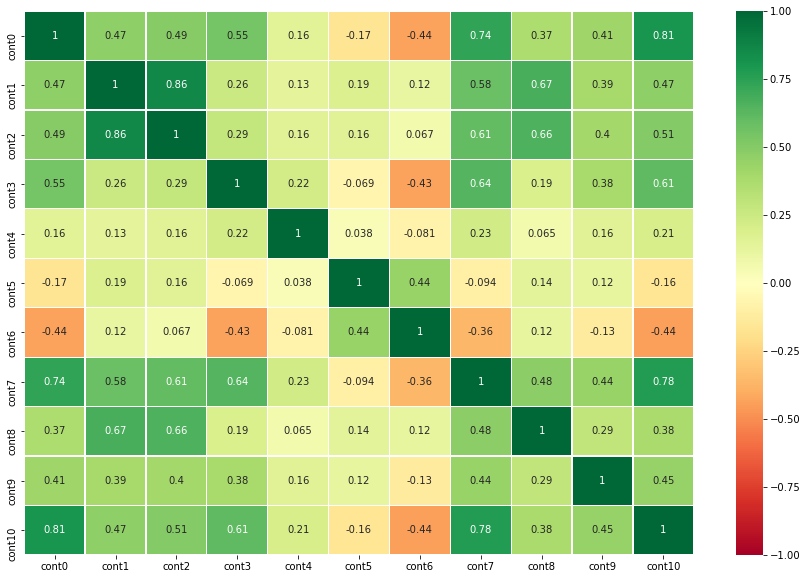

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
cont0,1.000000,0.474046,0.494622,0.549246,0.155805,-0.169393,-0.436555,0.740377,0.367794,0.414758,0.807896
cont1,0.474046,1.000000,0.861623,0.256854,0.133988,0.185838,0.116296,0.581201,0.672587,0.393313,0.471084
cont2,0.494622,0.861623,1.000000,0.286822,0.158749,0.158240,0.066997,0.606447,0.662832,0.399063,0.506684
cont3,0.549246,0.256854,0.286822,1.000000,0.222817,-0.068856,-0.429911,0.641923,0.188794,0.383062,0.611307
cont4,0.155805,0.133988,0.158749,0.222817,1.000000,0.037509,-0.081020,0.231526,0.064836,0.161150,0.208428
cont5,-0.169393,0.185838,0.158240,-0.068856,0.037509,1.000000,0.439221,-0.094008,0.141199,0.120901,-0.160551
cont6,-0.436555,0.116296,0.066997,-0.429911,-0.081020,0.439221,1.000000,-0.361585,0.123390,-0.125960,-0.443371
cont7,0.740377,0.581201,0.606447,0.641923,0.231526,-0.094008,-0.361585,1.000000,0.479203,0.443322,0.775453
cont8,0.367794,0.672587,0.662832,0.188794,0.064836,0.141199,0.123390,0.479203,1.000000,0.293181,0.382051
cont9,0.414758,0.393313,0.399063,0.383062,0.161150,0.120901,-0.125960,0.443322,0.293181,1.000000,0.452508


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation = df_train.loc[:, [f for f in features if f.startswith("cat") == False]].corr()

plt.figure(figsize=(15,10))
sns.heatmap(correlation, annot=True,cmap='RdYlGn',linewidths=0.2,  vmin=-1, vmax=1)
plt.show()
correlation

In [72]:
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif, SelectKBest, SelectPercentile

ff = cat_features
selection = SelectPercentile(chi2, percentile=10)
transformed = selection.fit_transform(df_train[ff], df_train["target"])
print([ff[f] for f in selection.get_support(True)])
# selection.transform(df_train[ff])

['cat15', 'cat16']


In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_train.loc[:, features], df_train.loc[:, "target"], random_state=10, stratify=df_train.loc[:, "target"])

print(x_train.shape, x_test.shape)

(225000, 30) (75000, 30)


In [8]:
from sklearn import metrics
def auc_train_test(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    preds = model.predict_proba(x_test)[:, 1]
    return metrics.roc_auc_score(y_test, preds)

In [31]:
model1 = xgb.XGBClassifier(n_jobs=-1, use_label_encoder=False)
model2 = xgb.XGBClassifier(n_jobs=-1, use_label_encoder=False)
model3 = xgb.XGBClassifier(n_jobs=-1, use_label_encoder=False)
model4 = xgb.XGBClassifier(n_jobs=-1, use_label_encoder=False)
print(auc_train_test(model1, x_train.loc[:, cat_features], x_test.loc[:, cat_features], y_train, y_test))
print(auc_train_test(model2, x_train.loc[:, add_cat_features], x_test.loc[:, add_cat_features], y_train, y_test))
print(auc_train_test(model3, x_train.loc[:, add_cat_selected_features], x_test.loc[:, add_cat_selected_features], y_train, y_test))
print(auc_train_test(model4, x_train.loc[:, cat_features + add_cat_selected_features], x_test.loc[:,cat_features +  add_cat_selected_features], y_train, y_test))

[19:07:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.882766649400548
[19:07:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8824294111305543
[19:07:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8712277511362574
[19:07:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explic

In [32]:
model5 = xgb.XGBClassifier(n_jobs=-1, use_label_encoder=False)
print(auc_train_test(model5, x_train.loc[:, cat_features + add_cat_selected_features + cont_features], x_test.loc[:,cat_features +  add_cat_selected_features +cont_features ], y_train, y_test))

[19:09:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.888381623569505


In [33]:
model6 = xgb.XGBClassifier(n_jobs=-1, use_label_encoder=False)
print(auc_train_test(model6, x_train, x_test, y_train, y_test))
# concatenating two cat vectors and selecting few didnt help much. (lost in fact).
# used all resulted in 0.0004 improvement

[19:11:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8889365062361746


In [35]:
from sklearn.feature_selection import RFE
model7 = xgb.XGBClassifier(n_jobs=-1, use_label_encoder=False)
rfe = RFE(estimator=model7)
# fit RFE
rfe.fit(df_train.loc[:, cat_features + add_cat_features], df_train["target"])
# get the transformed data with
# selected columns
X_transformed = rfe.transform(df_train.loc[:, cat_features + add_cat_features])

rfe_columns = [x for x, y in zip(cat_features + add_cat_features, support) if y == True]
print(rfe_columns)

model8 = xgb.XGBClassifier(n_jobs=-1, use_label_encoder=False)
print(auc_train_test(model8, x_train.loc[:, rfe_columns], x_test.loc[:, rfe_columns], y_train, y_test))auc_train_test
# same result as selectFromModel. Not naively concatenating categorical columns didnt help much

[19:37:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:37:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:38:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:38:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[19:47:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:47:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:47:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:47:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[19:55:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:55:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:55:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:55:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [7]:
model9 = xgb.XGBClassifier(n_jobs=-1, use_label_encoder=False)
print(auc_train_test(model9, x_train.loc[:, rfe_columns + cont_features], x_test.loc[:, rfe_columns + cont_features], y_train, y_test))
# same result as selectFromModel. Not naively concatenating categorical columns didnt help much

NameError: name 'xgb' is not defined

In [31]:
from sklearn.ensemble import RandomForestClassifier

clf1 = RandomForestClassifier()
clf1.fit(x_train, y_train)
print(clf1.predict_proba(x_test))

[[0.91 0.09]
 [0.78 0.22]
 [0.81 0.19]
 ...
 [0.09 0.91]
 [0.32 0.68]
 [0.97 0.03]]


In [37]:
from sklearn import metrics
preds = clf1.predict_proba(x_test)[:, 1]
print(metrics.roc_auc_score(y_test, preds))

0.8828637718310395


In [44]:
import xgboost as xgb
clf2 =  xgb.XGBClassifier(n_jobs=-1, use_label_encoder=False)
clf2.fit(x_train, y_train)

[21:37:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [45]:
preds2 = clf2.predict_proba(x_test)[:,1]
print(metrics.roc_auc_score(y_test, preds2))

0.8885369665939751


In [50]:
clf3 =  xgb.XGBClassifier(n_jobs=-1, use_label_encoder=False, objective="reg:squarederror")
clf3.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='reg:squarederror', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [51]:
preds3 = clf3.predict_proba(x_test)[:,1]
print(metrics.roc_auc_score(y_test, preds3))

0.8850823251013444


In [30]:
#trying target encoding
from category_encoders import TargetEncoder, WOEEncoder, CountEncoder

def encode(enc, x_train, y_train, x_test):
    x_train_transformed = enc.fit_transform(x_train, y_train)
    x_test_transformed = enc.transform(x_test)
    return x_train_transformed, x_test_transformed

te = TargetEncoder(cols=cat_features)
# x_train_transformed = te.fit_transform(x_train, y_train)
# x_test_transformed = te.transform(x_test)
xtrain1, xtest1 = encode(te, x_train, y_train, x_test) # has incl. num ff
print(xtrain1.shape, xtest1.shape)

we = WOEEncoder(cols=cat_features)
xtrain2, xtest2 = encode(we, x_train.loc[:, cat_features], y_train, x_test.loc[:, cat_features]) # only cat ff
print(xtrain2.shape, xtest2.shape)

ce = CountEncoder(cols=cat_features)
xtrain3, xtest3 = encode(ce, x_train.loc[:, cat_features], y_train, x_test.loc[:, cat_features]) # only cat ff
print(xtrain3.shape, xtest3.shape)

x_train_transformed = xtrain1.join(xtrain2, lsuffix="_enc1", rsuffix="_enc2").join(xtrain3)
x_test_transformed = xtest1.join(xtest2, lsuffix="_enc1", rsuffix="_enc2").join(xtest3)
print(x_train_transformed.shape, x_test_transformed.shape)

import xgboost as xgb
model1 = xgb.XGBClassifier(n_jobs=-1, use_label_encoder=False)
model2 = xgb.XGBClassifier(n_jobs=-1, use_label_encoder=False)

x_train_tmp = x_train.loc[:, cat_features].join(x_train_transformed, lsuffix="", rsuffix="_enc3")
x_test_tmp = x_test.loc[:, cat_features].join(x_test_transformed, lsuffix="", rsuffix="_enc3")
print(x_train_tmp.shape, x_test_tmp.shape)

print(auc_train_test(model1, x_train_transformed, x_test_transformed, y_train, y_test))
print(auc_train_test(model2, x_train_tmp, x_test_tmp, y_train, y_test))

# looks like target encoding helped. improved by 0.001 with our train set
# TE: 0.8891897094176843 0.889990999599158
# WOE: 0.8888822194229294 0.8899221107306091
# CE: 0.8887099538827322 0.888578754511699
# all: 0.8889184305662021 0.889294261156248

(225000, 30) (75000, 30)


/root/miniconda3/envs/TPS-MAR/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


(225000, 19) (75000, 19)


/root/miniconda3/envs/TPS-MAR/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


(225000, 19) (75000, 19)
(225000, 68) (75000, 68)
(225000, 87) (75000, 87)
[00:18:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8889184305662021
[00:18:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.889294261156248


In [39]:
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

ff = [f for f in x_train_tmp.columns if f not in ["id", "target"]]
print(len(ff))
model1 = RandomForestClassifier(n_jobs=-1)

sfm = SelectFromModel(estimator=model1)
sfm.fit(x_train_tmp.loc[:, ff], y_train)
support = sfm.get_support()
# get feature names
selected_features = [x for x, y in zip(x_train_tmp.columns, support) if y == True]
print(selected_features, len(selected_features))
# no help here

87
['cat7', 'cat15', 'cat16', 'cat18', 'cat1_enc1', 'cat7_enc1', 'cat8_enc1', 'cat10_enc1', 'cat15_enc1', 'cat16_enc1', 'cat18_enc1', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cat1_enc2', 'cat7_enc2', 'cat8_enc2', 'cat10_enc2', 'cat15_enc2', 'cat16_enc2', 'cat18_enc2', 'cat16_enc3'] 30


In [41]:
model2 = xgb.XGBClassifier(n_jobs=-1, use_label_encoder=False, objective='binary:logistic')
print(auc_train_test(model2, x_train_tmp.loc[:, selected_features], x_test_tmp.loc[:, selected_features], y_train, y_test))
# no help here

[01:47:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8818386724884674


In [11]:
# trying automl
import autosklearn.classification
clf= autosklearn.classification.AutoSklearnClassifier(n_jobs=2)
print(auc_train_test(clf, x_train, x_test, y_train, y_test))

KeyboardInterrupt: 

In [67]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder, WOEEncoder, CountEncoder
from sklearn import preprocessing


def encode(enc, x_train, y_train, x_test):
    x_train_transformed = enc.fit_transform(x_train, y_train)
    x_test_transformed = enc.transform(x_test)
    return x_train_transformed, x_test_transformed


df_train = pd.read_csv("train.csv")

# df_train[cat_features] = df_train[cat_features].astype('category')
# df_train["target"] = df_train["target"].astype('category')

for f in df_train.columns:
    if f.startswith("cat"):
        le = preprocessing.LabelEncoder()
        df_train.loc[:, f] = le.fit_transform(df_train.loc[:, f])
        
# print(df_train[features[2]])

x_train, x_test, y_train, y_test = train_test_split(df_train.loc[:, features], df_train.loc[:, "target"], random_state=10, stratify=df_train.loc[:, "target"])
print(x_train.shape, x_test.shape)
print(x_train)
te = TargetEncoder(cols=cat_features)
x1, x2 = encode(te, x_train.loc[:, cat_features], y_train, x_test.loc[:, cat_features])
print(x1.shape, x2.shape)

x_train = x_train.join(x1, lsuffix="", rsuffix="_enc")
x_test = x_test.join(x2, lsuffix="", rsuffix="_enc")



# x_train[cat_features] = x_train[cat_features].astype('category')
# y_train = y_train.astype('category')
# x_test[cat_features] = x_test[cat_features].astype('category')
# y_test = y_test.astype('category')

# print(x_train.shape, y_train.shape)
# print(x_test.shape, y_test.shape)

cat_features_idx = [i for i in range(len(x_train.columns)) if x_train.columns[i].startswith("cat") == True] # have to specify idx for lgbm, not working with columns name weird
clf = LGBMClassifier(n_jobs=-1, categorical_feature=cat_features_idx)
print(auc_train_test(clf, x_train, x_test, y_train, y_test))
# without target encoding = 0.8904548227971474
# with target encoding = 0.8907654298691738

(225000, 30) (75000, 30)
        cat0  cat1  cat2  cat3  cat4  cat5  cat6  cat7  cat8  cat9  ...  \
277882     0     8     0     1     4    31     0    46    19     0  ...   
115779     0    11     8     1     6    33     0    47    60     0  ...   
293722     1     7     0     0     5    33     0    43    23     2  ...   
20246      0    11     2     1     4    33     0    30    38     0  ...   
33503      0     5     0     0     5    33     0     8    45     4  ...   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
126546     1    10     0     0     4    33     0    15    49     2  ...   
168458     0     6     0     0     6    33     2    28    19     0  ...   
162007     0     5     0     0     7    33     0    35    45     4  ...   
167093     0     9     3     1     6    33     0    19     3     0  ...   
96566      1    10     0     0     4    33     0    19    55     5  ...   

           cont1     cont2     cont3     cont4     cont5     cont6     con

/root/miniconda3/envs/TPS-MAR/lib/python3.9/site-packages/lightgbm/basic.py:1075: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  warnings.warn('{0} keyword has been found in `params` and will be ignored.\n'


0.8904548227971474


In [59]:
print(list(map(lambda x: "name:" + x, cat_features)))

['name:cat0', 'name:cat1', 'name:cat2', 'name:cat3', 'name:cat4', 'name:cat5', 'name:cat6', 'name:cat7', 'name:cat8', 'name:cat9', 'name:cat10', 'name:cat11', 'name:cat12', 'name:cat13', 'name:cat14', 'name:cat15', 'name:cat16', 'name:cat17', 'name:cat18']
